# APRENDIZAJE AUTOMÁTICO 1

Los datos más usados son los `datos tabulados` que se representan en tablas:
- cada **fila** es un **ejemplo**
- cada **columna** sin tratar es un **atributo** $\rightarrow$ *datos en crudo*
- cada **columna** tratada es una **serie**

#### Descargar base de datos:

In [58]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

## 01_Tipos de datos:

### Tipos de datos: (`continuos`, `discretos` y `categóricos`)

Cada columna puede tener tipos de datos diferentes:
- atributos continuos $\rightarrow$ Son aquellos atributos que pueden tomar cualquier valor en un intervalo de $\mathbb R$.
- atrubutos discretos $\rightarrow$ Son aquellos atributos que pueden tomar solo un número finito de valores dentro de un intervalo $(a,b)$.
- atributos categóricos $\rightarrow$ Son aquellos atributos que pueden tomar sólo un número finito de valores dentro de un conjunto que puede no tener una relación de orden entre sus miembros.

Los `dtypes` de un dataframe pueden ser:
- `int64`: Números enteros
- `float64`: Números de punto flotante
- `object`: Tipo general para texto, o columnas mixtas de números y texto
- `bool`: Valores booleanos: True/False
- `datetime64`: Fecha y hora
- `timedelta[ns]`: Diferencias entre dos datetimes
- `category`: Lista finita de valores de texto

### Codificación de valores categóricos:

- Codificación a valores enteros $\rightarrow$ cada categoría se corresponde con un número
- Codificación One-Hot $\rightarrow$ se crea una columna por cada categoría y se indica con 0 o 1 si se pertenece a esa categoría

### Ejemplos:

In [59]:
# Tipos de datos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [60]:
# Codificación a enteros:
df_code = df.copy()
codes = df_code['species'].cat.codes
code_to_categ = dict(zip(codes, df_code['species']))
df_code['species'] = codes

df_code.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [61]:
# Codificación One-Hot:
df_OneHot = df.copy()
OneHot = pd.get_dummies(df_OneHot['species'])
df_OneHot = pd.concat([df_OneHot, OneHot], axis = 1)

df_OneHot.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0


## 02_Separar explorar y rellenar

### Separación de datos: 

Es MUY importante separar los datos en `train` y `test` y no mezclar los datos hasta entonces para poder enntrenar bien el modelo.

### Exploración de datos:

Descripción estadística: nos sirve para saber los información importante de los datos con los que vamos a trabajar y hacernos una idea de cómo están descritos.

### Visualización de la distribución:

No siempre vamos a poder visualizar los datos por tener demasiados. Pero si tenemos 'pocos' datos los podemos ver de la siguiente forma:

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='species', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='species', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel

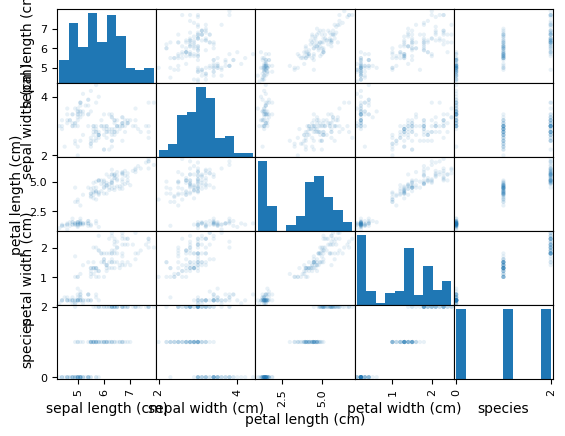

In [68]:
pd.plotting.scatter_matrix(df_code, alpha=0.1)

### Tratamiento de valores perdidos:

1) Averiguar dónde están
2) Valorar si __sustituirlos__ (imputación de los valores perdidos) o __eliminar__ el atributo o ejemplo por exceso de valores perdidos
3) Opcionalmente se puede añadir una columna para indicar los valores que han sido sustituidos y los que no

__Imputación Univariada__: consiste en sustituir los valores perdidos por un estadístico de la columna (media, mediana o moda). Lo malo de esta técnica es que puede crear ejemplos imposibles como por ejemplo asignar a una mujer cáncer de próstata.

__Imputación Multivariada__: estima el valor perdido en función del resto de atrubutos del ejemplo.


### Ejemplos:

In [ ]:
# Separación de datos en train-test:

## Pasos a realizar para limpiar el `df`:

#### 1. Importar las librerías que se van a utilizar:

In [62]:
import pandas as pd             # Manejo de datos
import numpy as np              # Manejo de arrays n-dimensionales y func. matemáticas
import scipy                    # Manejo de func. matemáticas y distrib. de probabilidad
#import sklearn                 # Biblioteca de ML
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import random                   # Generación aleatoria
import matplotlib.pyplot as plt # Generación de gráficos

#### 2. Abrir la `BD`

In [63]:
# fullSet = pd.read_csv('folder_name + file_name')
# fullSet = pd.read_csv('sample_data/california_housing_train.csv')

#### 3. Dividir la `BD` en `train` y `test` 
> _MUY IMPORTANTE NO TOCAR EL TEST UNA VEZ CREADO_

##### 3.1 Guardar el número de filas (`N`) y columnas (`D`) en variables

In [64]:
N,D = fullSet.shape

NameError: name 'fullSet' is not defined

##### 3.2 Hacer la división del `df` en `train` y `test` indicando el porcentaje de cada uno

> _En este caso va a ser 20% `test` y 80% `train`_

In [ ]:
fraction_test = 0.2                   # El 0.2 de las filas del df va a ser del test

idx = fullSet.index.tolist()          # Mete todos los índices del df en una lista
random.shuffle(idx)                   # Mezcla la lista con los índices del df antes de hacer la división para que sea más homogénea

N_test = int(N*fraction_test)         # Calcula el número de filas que se van a guardar en el conjunto de 'test'
testSet = fullSet.iloc[idx[:N_test]]
trainSet = fullSet.iloc[idx[N_test:]]

Otra opción usando la librería sklearn:

In [ ]:
from sklearn.model_selection import train_test_split 

X= df['Head Size(cm^3)'] 
y=df['Brain Weight(grams)'] 
  
# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)   # random_state es la semilla que utiliza para la división de los datos
                                                                                                            # shuffle = True indica que los datos se mezclen antes de hacer la divisón

##### 3.3 Muestra el tamaño de cada muestra y guarda cada uno de los nuevos df en archivos diferentes

In [ ]:
print(f'El tamaño del conj. de entrenamiento es: ',trainSet.shape)
print(f'El tamaño del conj. de test es: ',testSet.shape)

Guardar los datos de entrenamiento:

In [ ]:
flag_save_test = True          # Guarda para el bucle de la división
if flag_save_test:
  train_folder = "....." #<- ruta de la carpeta, por ejemplo "sample_data/"
  train_name   = "....." #<- nombre del CSV donde guardamos testSet
  trainSet.to_csv(train_folder + train_name, dec='.', sep=';', header=True)

Guardar los datos de test:

In [ ]:
flag_save_test = True          # Guarda para el bucle de la división
if flag_save_test:
  test_folder = "....." #<- ruta de la carpeta, por ejemplo "sample_data/"
  test_name   = "....." #<- nombre del CSV donde guardamos testSet
  testSet.to_csv(test_folder + test_name, dec='.', sep=';', header=True)

#### 4. Información de los datos `INFO`:

In [ ]:
N,D = df.shape                                                              # Tamaño del conjunto de datos
print(f'El tamaño del conjunto de datos es: {df.shape}\n\n', df.dtypes)     # Tipo de dato de cada atributo

In [ ]:
df.describe()   # Indica la descripción estadística básica excepto la moda de cada atributo en forma de tabla

#### 5. Codificación de los datos categóricos

##### _Creación del dataframe de ejemplo:_

In [ ]:
N = 10
df_categorico = pd.DataFrame({
    'Atributo 1': [random.choice(['hombre', 'mujer']) for _ in range(N)],
    'Atributo 2': [random.choice(['rojo', 'verde', 'azul']) for _ in range(N)],
}, dtype="category")

print(df_categorico)

##### 5.1 Asignación automática por Python

Los datos categóricos se tienen que cambiar a valores numéricos para poder trabajar con ellos de forma más cómoda.

Pandas permite codificar con enteros una Serie.<br>
Por ejemplo:  `df_categorico['Atributo 1'].cat.codes`

Si queremos codificar todos los atributos categóricos de un DataFrame debemos recorrer sus columnas ejecutando `cat.codes`.

Para saber a qué categoría se corresponde cada entero lo mejor es ir creando un diccionario al mismo tiempo. Para ello juntaremos códigos y categorías en la estructura de datos `dict` de Python.

In [ ]:
codes1 = df_categorico['Atributo 1'].cat.codes                  # Codifica cada valor de la serie 'Atributo 1'
code_to_categ1 = dict(zip(codes1,df_categorico['Atributo 1']))  # Recupera la categoría a partir del código asignado

codes2 = df_categorico['Atributo 2'].cat.codes                  # Codifica cada valor de la serie 'Atributo 2'
code_to_categ2 = dict(zip(codes2,df_categorico['Atributo 2']))  # Recupera la categoría a partir del código asignado

In [ ]:
print('Diccionario código->categoría: ',code_to_categ1)
print('Diccionario código->categoría: ',code_to_categ2)

##### 5.2 Asignación manual

In [ ]:
categorias1 = df_categorico['Atributo 1'].unique()                                                          # Indica cuántas categ. diferentes y cuáles hay en el df con '.unique'
categ_to_code1= {string: i for i, string in enumerate(categorias1)}                                         # Crea el diccionario con las relaciones de valores
categ1 = df_categorico['Atributo 1'].map(categ_to_code1)                                                    # Aplica el cambio de valor al df

categorias2 = ['blanco','amarillo','verde','cian','rosa','azul','morado','rojo','marrón','gris','negro']    # Lista de posibles dibujos que pueden aparecer
categ_to_code2= {string: i for i, string in enumerate(categorias2)}                                         # Recorre la lista y asocia un número a cada color y lo guarda en un diccionario
categ2 = df_categorico['Atributo 2'].map(categ_to_code2)                                                    # Aplica el cambio de valor al df

In [ ]:
print('Diccionario categoría->código: ',categ_to_code1)
print(categ1, "\n")

print('Diccionario categoría->código: ',categ_to_code2,)
print(categ2)

##### 5.3 Automatización

Estos métodos están orientados a Series, es decir a columnas. <br>
Si queremos cambiar todas las columnas categóricas por un código debemos hacerlo en un bucle PERO primero hay que identificar en cuales hay que actuar.

In [ ]:
# 1) averiguamos las columnas categóricas
cat_cols = df_categorico.select_dtypes(include='category').columns.tolist()
# 2) creamos un dataframe con las columnas categóricas pero sin filas
df_cat_coded = pd.DataFrame(columns=cat_cols)
# 3) creamos un bucle que las recorra y las codifique, a la vez que creamos una diccionario de diccionarios para descodificar en el futuro
dict_decode={}
for col in cat_cols:
  codes = df_categorico[col].cat.codes
  code_to_categ = dict(zip(codes,df_categorico[col]))
  df_cat_coded[col] = codes
  dict_decode[col] = code_to_categ

In [ ]:
print(df_cat_coded)
print(dict_decode)

##### 5.4 Codificación _One-hot_

En esta codificación se crea una columna extra por cada categoría e indica con `1` en aquel valor que sí lo cumple y con `0` el que no.

<u>_Ejemplo:_</u><br> Para el atributo "Color" con tres categorías _{Rojo, Verde, Azul}_ se crearían 3 columnas: "Rojo", "Verde" y "Azul".

In [ ]:
one_hot = pd.get_dummies(df_categorico['Atributo 1'])   #Crear un df nuevo únicamente con las nuevas series de datos
df = pd.concat([df_categorico, one_hot], axis=1)        # Unir el dataframe original con el dataframe codificado
df

##### 5.5 Librerías de codificación

En particular, en La biblioteca **SciKit-Learn** de Python podemos encontrar algunos métodos de codificación similares a los que hemos visto en Pandas. <br>
Conviene conocerlos pero no los utilizaremos hasta que no empezemos a aprender modelos.

| | |
|----|----|
| `preprocessing.LabelEncoder` | Encode target labels with value between 0 and n_classes-1 |
| `preprocessing.OneHotEncoder` | Encode categorical features as a one-hot numeric array |
| `preprocessing.OrdinalEncoder` | Encode categorical features as an integer array. |
| `preprocessing.TargetEncoder` |  	Target Encoder for regression and classification targets |

#### 6. Exploración de los datos (`INFO`)

##### 6.1 Descripción estadística básica:
- Tamaño del conjunto de datos (número de ejemplos (`filas`) y dimensionalidad (`columnas`)): $N=?, D=?$
- Localizar atributos **NO** numéricos y convertirlos
- Media y desviación estandard de cada atributo: $\mu(x_i)=?$, $\sigma_i(x_i)=?$ , para $i=1\ldots D$.
- Mediana de cada atributo: $Q_{50}(x_i)=?$
- Moda de cada atributo: $\text{Moda}(x_i) = ?$
- Máx. y mín. de cada atributo: $\max(x_i)= ?$  , $\min(x_i)= ?$

Opción 1: ir  viendo los datos de cada atributo por separado y guardándolos en variables diferentes

In [ ]:
N,D = trainSet.shape                                # Tamaño del df
trainSet.dtypes                                     # Tipo de dato de cada atributo
media = trainSet['atributo'].mean()                 # Media
desviacion_estandar = trainSet['atributo'].std()    # Desviación estandar
mediana = trainSet['atributo'].median()             # Mediana
moda = trainSet['atributo'].mode()[0]               # mode() devuelve una serie porque puede tener más de una moda, así que tomamos el primer elemento (Pero también se puede guardar toda la lista)
maximo = trainSet['atributo'].max()                 # Máximo
minimo = trainSet['atributo'].min()                 # Mínimo

Opción 2: ver toda la información diréctamente sin guardar cada dato

In [ ]:
print(trainSet.info())              # Indica el tamaño, los tipos de datos y cuántos son 'Na' de cada atributo
trainSet.describe()                 # Indica la descripción estadística básica excepto la moda de cada atributo en forma de tabla
trainSet.mode(axis=0, dropna=False) # Devuelve una tabla con las modas de cada atributo

##### 6.2 Visualización de la distribución de los datos (`Cuidado`)

> Hay que intentar `realizar los ejercicios sin visualizar los datos` porque va a haber ocasiones que nuestra `base de datos` sea tan `grande` que sea imposible abarcarlo todo

Pero para `algunos casos` viene `bien` visualizar los datos, es por ello que hacemos uso de las gráficas.
El siguiente código compara cada una de los atributos de la tabla con el resto.

In [ ]:
pd.plotting.scatter_matrix(trainSet, alpha=0.1)

#### 7. Procesado de datos: Tratamiento de valores perdidos (`Na`)

Para tratar los valores perdidos debemos:
1. Averiguar dónde están
2. Valorar si rellenamos los huecos (imputación de valores perdidos) <br>
o tomamos otra decisión como eliminar el ejemplo el atributo.
3. Opcionalmente se puede añadir un nueva columna a la derecha de aquella donde se hayan imputado valores, marcando las celdas donde ha habido imputación como muestra la figura de abajo.

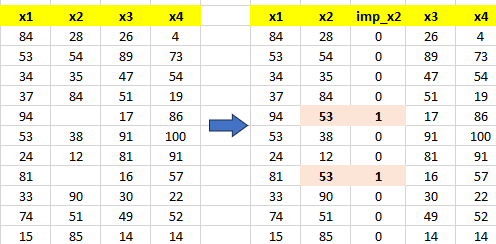

##### 7.1 Localización de valores perdidos (NA):

`Si los valores nulos (NA) no están indicados como tal se puede usar el siguiente comando para cambiarlos a NA.`<br>
En el siguiente caso los valores se indican como `'?'`

In [ ]:
trainSet = trainSet.replace('?', pd.NA)

Los métodos `isnull()` e `isna()` de la librería Pandas devuelven un booleano (True o False) por cada celda del dataframe con un valor 'NA'.
- No existe ninguna diferencia entre ambos métodos. Son idénticos.

In [ ]:
missing_data = trainSet.isna()
missing_data.sum()                  # Muestra la cantidad de NA por cada columna

Ahora hay que ver cuántos valores 'NA' faltan en cada columna y cada fila:

In [ ]:
missing_values_per_column = missing_data.sum(axis=0)    # 'NA' por cada columna
missing_values_per_row = missing_data.sum(axis=1)       # 'NA' por cada fila

mask_mayorq0 = missing_values_per_column > 0            # Crea una máscara de Pandas para indicar si hay columnas con NA
mask_mayorq1 = missing_values_per_row > 0               # Crea una máscara de Pandas para indicar si hay filas con NA

print('Columnas con valores nulos', missing_values_per_column[mask_mayorq0], '\n')
print('Columnas con valores nulos', missing_values_per_row[mask_mayorq1], '\n')

Para ver mejor cuantos valores faltantes hay en cada fila podemos ejecutar el siguiente código que nos indicará cuantos atributos faltantes (columna de la izquierda) tienen _tantos núm._ de filas (columnas de la derecha):

In [ ]:
missing_count = missing_values_per_row.value_counts().sort_index()
print(missing_count)

##### 7.2 Eliminación de filas y columnas con número `excesivo` de atributos perdidos:

> Eliminación de filas con número `excesivo` de atributos perdidos:

In [ ]:
missing_count.index[-1]                                             # Calcular la cantidad máxima de valores nulos por fila
mask_toDrop = missing_values_per_row >= missing_count.index[-1]     # Filtro que busca las filas con el número de valores perdidos máximo
drop_list = missing_values_per_row[mask_toDrop].index.tolist()      # Crea una lista de índices de las filas que cumplen con la condición
df.drop(drop_list, inplace=True)                                    # Eliminar las filas guardadas en 'drop_list' del DataFrame original

print(f'Tras eliminar las filas con más NaN, tenemos una tabla de tamaño:', df.shape)

> 6.2.2 Eliminación de columnas con número `excesivo` de atributos perdidos:

In [ ]:
missing_count = missing_values_per_column.value_counts().sort_index()
print(missing_count)                                                    # Visualización de cantidad de datos perdidos por columna

missing_count.index[-1]                                                 # Calcular la cantidad máxima de valores nulos por fila
mask_toDrop = missing_values_per_column >= missing_count.index[-1]      # Filtro que busca las filas con el número de valores perdidos máximo
drop_list = missing_values_per_column[mask_toDrop].index.tolist()       # Crea una lista de índices de las filas que cumplen con la condición
df.drop(drop_list, inplace=True)                                        # Eliminar las filas guardadas en 'drop_list' del DataFrame original, al usar implace no hace falta poner 'df = ...'

print(f'Tras eliminar las filas con más NaN, tenemos una tabla de tamaño:', df.shape)

##### 7.3 `IMPUTACIÓN UNIVARIADA`

Añadir un valor al NA en función del resto de valores de la lista:<br>
(se puede añadir una columna indicando si se ha modificado el dato o no)

Este estadístico puede ser:
- la **media**, si los valores de ese atributo están distribuidos según una normal.
- la **mediana**, si no lo están. `Además la mediana es mejor opción si hubiera valores muy extremos dentro de esa columna` (valores *outliers*).
- el **valor más repetido** (moda), si se trata de una columna de valores categóricos.

En el siguiente código puedes ver un ejemplo de cómo funciona:

In [ ]:
df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 6, 7, 8]})         # Crea un nuevo data frame con valores faltantes
df.fillna(df.median(axis=0),inplace=True)                               # A los valores faltantes les dá el valor de la mediana
# se cambian los valores según la mediana y el parámetro inplace realiza el cambio diréctamente sin tener que asignarle una variable (x = foo.fillna(...))
df

Posibles problemas:
- Si el valor depende del tiempo (el pulso por ejemplo $\rightarrow$ función continua) se puede usar la función `interpolate()` que rellena el dato según los que tenga a su alrededor, para no tener saltos en la función de datos.

- Si un dato depende del resto: falta el género del paciente, si se pone el más repetido (mujer) y se va a operar de fimosis es imposible.

##### 7.4 `IMPUTACIÓN MULTIVARIADA`

Calcula el valor imputado en función del resto de atributos. Estima el valor perdido mediante una regresión (técnica de machine learning supervisada)

#### 8. Ingeniaría de características

Llamaremos **vector características** (*features*) al vector con el que describimos cada ejemplo de manera definitiva, es decir el vector que finalmente se utiliza para aprender la tarea.

El vector de características puede coincidir con los atributos, pero también puede ser menor o mayor.
- **Menor**, si hemos eliminado atributos porque no resultaban útiles.
- **Mayor**, si hemos añadido nuevas columnas calculadas a partir de las que había inicialmente.
- **Igual**, si nos quedamos exactamente con los atributos dados o si creamos exactamente tantas columnas como las que eliminamos.

##### 8.1 Aumento/Reducción de la dimensionalidad:

Lo que se hace es relacionar columnas entre sí, haciendo crecer el `df` en columnas. Al aumentar el número de dimensiones (columnas) obtenemos más información de los datos y es más fácil crear una línea recta que divida el conjunto de datos.

Ej:
$$\small
\text{Densidad de población} = \frac{\text{Población}}{\text{Superficie}}.
$$

In [ ]:
# Ejemplo de como hacer aumentado de dimensionalidad mediante
# características polinómicas.

degree = 2
interaction_only = True    # Si es 'True' solo calcula las interaciones entre columnas diferentes. Y si es 'False' calcula todas las interacciones, también una columna por sí misma

df = pd.DataFrame({'x1': [1, 2, 3], 'x2': [4, 5, 6], 'x3': [7, 8, 9]})

polyf = PolynomialFeatures(degree=degree, interaction_only=interaction_only)
polyf.set_output(transform="pandas")

polyf.fit(df)                   # No se puede hacer esta línea de comando con el test NUNCA
df_poly = polyf.transform(df)   # Adapta los datos a las nuevas características


print('Dataframe inicial:')
print(df)
print('\nDataframe aumentado:')
print(df_poly)

##### 8.2  Escalado al intervalo [0, 1]:

Dada una columna $x$, donde $x_{\rm min}~$ y $x_{\rm max}$ son el valor mínimo y máximo alcanzados, entonces la siguiente formula escala todos los valores al intervalo $[0,1]$

$$x_{\rm esc} = \frac{x - x_{\rm min}}{x_{\rm max}-x_{\rm min}}$$

- Esta operación se debe hacer columna a columna ya que los valores máximo y mínimo de $x_i$ pueden ser diferentes a los de $x_j$.
- Como resultado tenemos todas las características a la misma escala.
- Podemos utilizar `sklearn.preprocessing.MinMaxScaler`

##### 8.3 Estandarización

Dada una columna $x$, con media $\mu$ y desviación $\sigma$, entonces la siguiente fórmula *estandariza* todos los valores de dicha columna
$$x_{\rm std} = \frac{x - \mu}{\sigma}$$

- Estandarizar significa qu
e tiene media cero y desviación unidad.
- Esto **NO** significa que hayamos convertido la distribución de la columna $x$ en una normal. $$¿ ~~ x_{\rm std} \sim \mathcal{N}(0,1) ~~ ?~~ \Large \leftarrow\text{ ¡NO!}$$
- Podemos utilizar `sklearn.preprocessing.StandardScaler`

La estandarización de datos es esencial para garantizar que los datos sean precisos, completos y uniformes3, lo que facilita su análisis y comparación

In [ ]:
scalerStd = StandardScaler().set_output(transform="pandas")
scalerStd.fit(df)   # Estandariza los datos para que la media sea 0 y la desviación típica sea 1 (o valores aproximados)
scaleStd_df = scalerStd.transform(df)